### **Connect With Me in Linkedin** :- https://www.linkedin.com/in/dheerajkumar1997/

# About Company
<br>
<br>

**Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.**

# problem
<br>
<br>

**Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.**

# Data
<br>
<br>

**Loan_ID**
<br>
<br>
**Gender**
<br>
<br>
**Male/ Female**
<br>
<br>
**Married**
<br>
<br>
**Dependents**
<br>
<br>
**Number of dependents**
<br>
<br>
**Education**
<br>
<br>
**Self_Employed**
<br>
<br>
**ApplicantIncome**
<br>
<br>
**CoapplicantIncome**
<br>
<br>
**LoanAmount**
<br>
<br>
**Loan_Amount_Term**
<br>
<br>
**Credit_History**
<br>
<br>
**Property_Area**
<br>
<br>
**Loan_Status**
<br>
<br>

#  Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df = pd.read_csv("E:\Downlload\LOAN_PREDICTION_ANALYTICS_VIDHYA_TRAIN.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Preprocessing

In [3]:
df = df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]

In [4]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Feature Engineering

In [5]:
cat_label = [var for var in df.columns if df[var].dtypes == "object"]
cat_label = df[cat_label]
cat_label

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [6]:
cat_label['Gender'] = pd.get_dummies(cat_label['Gender'])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
cat_label['Married'] = pd.get_dummies(cat_label['Married'])

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
def encode_Education(Education):
    if Education =="Graduate":
        return 1
    else:
        return 0
    
cat_label['Education'] = cat_label['Education'].apply(encode_Education)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
def encode_Self_Employed(Self_Employed):
    if Self_Employed =="Yes":
        return 1
    else:
        return 0
    
cat_label['Self_Employed'] = cat_label['Self_Employed'].apply(encode_Self_Employed)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [10]:
def encode_Property_Area(Property_Area):
    if Property_Area =="Urban":
        return 1
    else:
        return 0
    
cat_label['Property_Area'] = cat_label['Property_Area'].apply(encode_Property_Area)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
def encode_Loan_Status(Loan_Status):
    if Loan_Status =="Y":
        return 1
    else:
        return 0
    
cat_label['Loan_Status'] = cat_label['Loan_Status'].apply(encode_Loan_Status)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [12]:
cat_label

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0,1,0,1,0,1,1
1,0,0,1,1,0,0,0
2,0,0,0,1,1,1,1
3,0,0,0,0,0,1,1
4,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...
609,1,1,0,1,0,0,1
610,0,0,3+,1,0,0,1
611,0,0,1,1,0,1,1
612,0,0,2,1,0,1,1


In [13]:
num_label = [var for var in df.columns if df[var].dtypes != "object"]
num_label = df[num_label]
num_label

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [14]:
df_new = pd.concat([num_label,cat_label],axis=1)
df_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,NaN,360.0,1.0,0,1,0,1,0,1,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,0,0,1,1,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,1,0,1,0,0,1
610,4106,0.0,40.0,180.0,1.0,0,0,3+,1,0,0,1
611,8072,240.0,253.0,360.0,1.0,0,0,1,1,0,1,1
612,7583,0.0,187.0,360.0,1.0,0,0,2,1,0,1,1


In [15]:
def encode_Dependents(Dependents):
    if Dependents =='1':
        return 1
    elif Dependents =='2':
        return 2
    elif Dependents =='3+':
        return 3
df_new['Dependents'] = df_new['Dependents'].apply(encode_Dependents)

In [16]:
df_new['Dependents'].value_counts() 

1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [17]:
x = df_new.drop(['Loan_Status'],axis=1)
y = df_new['Loan_Status']

In [18]:
x.isna().sum()

ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Gender                 0
Married                0
Dependents           360
Education              0
Self_Employed          0
Property_Area          0
dtype: int64

In [19]:
x['LoanAmount'] =x['LoanAmount'].fillna(x['LoanAmount'].median())

In [20]:
x['Loan_Amount_Term'] =x['Loan_Amount_Term'].fillna(x['Loan_Amount_Term'].median())

In [21]:
x['Credit_History'] =x['Credit_History'].fillna(x['Credit_History'].median())

In [22]:
x['Dependents'] =x['Dependents'].fillna(x['Dependents'].median())

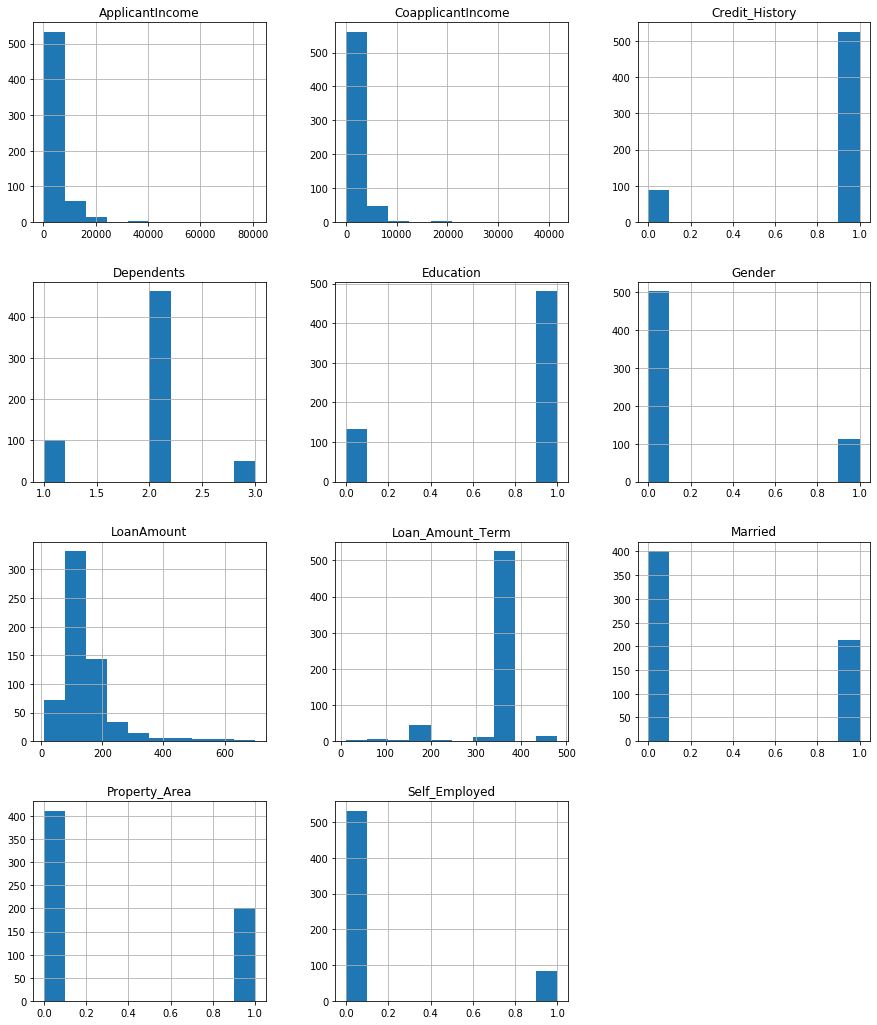

In [23]:
def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
show_hist(x)

In [32]:
x['ApplicantIncome'] = np.log1p(x['ApplicantIncome'])
x['LoanAmount'] = np.log1p(x['LoanAmount'])

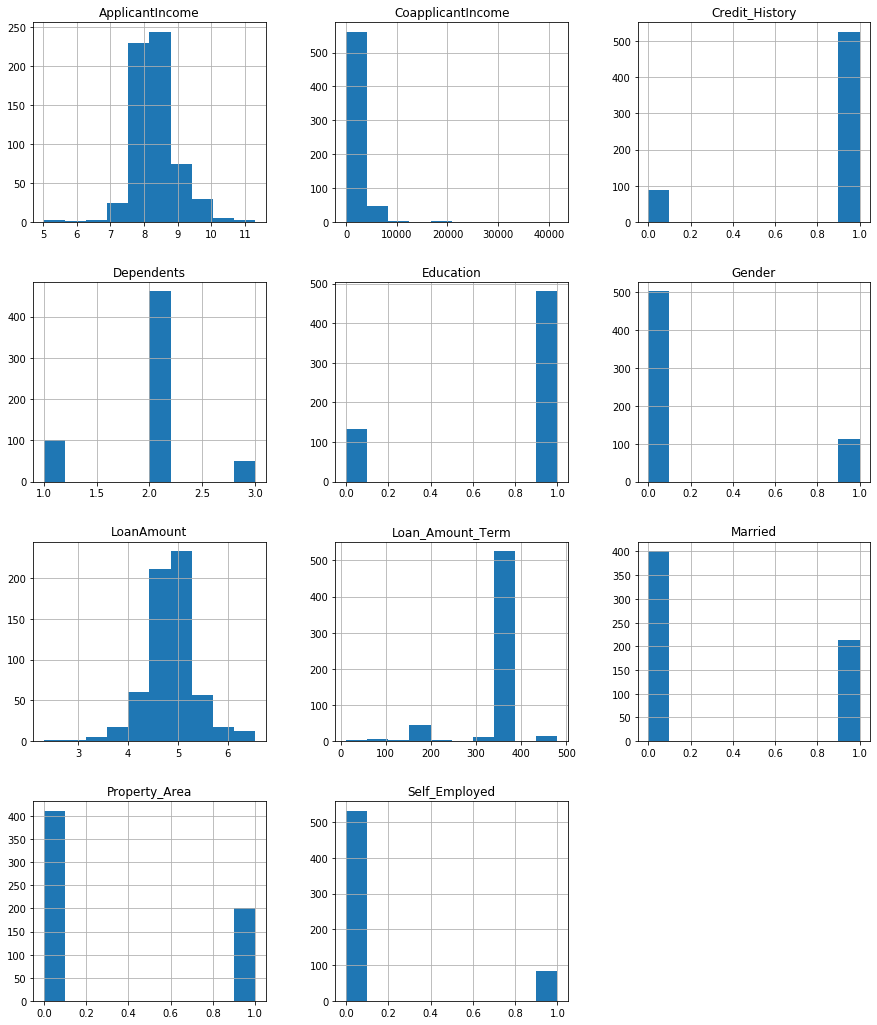

In [33]:
show_hist(x)

In [119]:
x = x.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.581854,0.000000,0.601711,0.743590,1.0,0.0,1.0,0.5,1.0,0.0,1.0
1,0.543052,0.036192,0.601711,0.743590,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.475649,0.000000,0.447563,0.743590,1.0,0.0,0.0,0.5,1.0,1.0,1.0
3,0.451844,0.056592,0.586647,0.743590,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,0.585909,0.000000,0.624304,0.743590,1.0,0.0,1.0,0.5,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.470256,0.000000,0.464498,0.743590,1.0,1.0,1.0,0.5,1.0,0.0,0.0
610,0.525569,0.000000,0.332003,0.358974,1.0,0.0,0.0,1.0,1.0,0.0,0.0
611,0.633101,0.005760,0.761131,0.743590,1.0,0.0,0.0,0.0,1.0,0.0,1.0
612,0.623159,0.000000,0.690332,0.743590,1.0,0.0,0.0,0.5,1.0,0.0,1.0


# Model Building

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [122]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier(class_weight = ({0:100, 1:99929180})))])
pipeline_Nb=Pipeline([('Nb_Gaussion',GaussianNB())])
pipeline_XGb=Pipeline([('XGb_classifier',XGBClassifier())])
pipeline_KN=Pipeline([('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=25))])

In [123]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_Nb,pipeline_XGb,pipeline_KN]

In [124]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'GaussianNB',4:'XGBClassifier',5:'pipeline_KN'}

In [125]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [189]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))
    print(classification_report(y_test,model.predict(x_test)))
    y_pred_new=model.predict(x_test)

Logistic Regression Test Accuracy: 0.8486486486486486
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185

Decision Tree Test Accuracy: 0.7297297297297297
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        58
           1       0.83      0.76      0.79       127

    accuracy                           0.73       185
   macro avg       0.70      0.71      0.70       185
weighted avg       0.75      0.73      0.74       185

RandomForest Test Accuracy: 0.8162162162162162
              precision    recall  f1-score   support

           0       0.72      0.67      0.70        58
           1       0.85      0.88      0.87       127

    accuracy                     

In [128]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [130]:
grid_search.fit(x_train, y_train)
# print results
print(grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min


{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.2min finished


In [134]:
from sklearn.model_selection import cross_val_score
rfc_predict = grid_search.predict(x_test)
rfc_cv_score = cross_val_score(grid_search, x, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.1min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.4min finished


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.4min finished


=== Confusion Matrix ===
[[ 35  23]
 [  6 121]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.85      0.60      0.71        58
           1       0.84      0.95      0.89       127

    accuracy                           0.84       185
   macro avg       0.85      0.78      0.80       185
weighted avg       0.84      0.84      0.83       185





In [195]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.8540540540540541
[[ 35  23]
 [  4 123]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        58
           1       0.84      0.97      0.90       127

    accuracy                           0.85       185
   macro avg       0.87      0.79      0.81       185
weighted avg       0.86      0.85      0.84       185



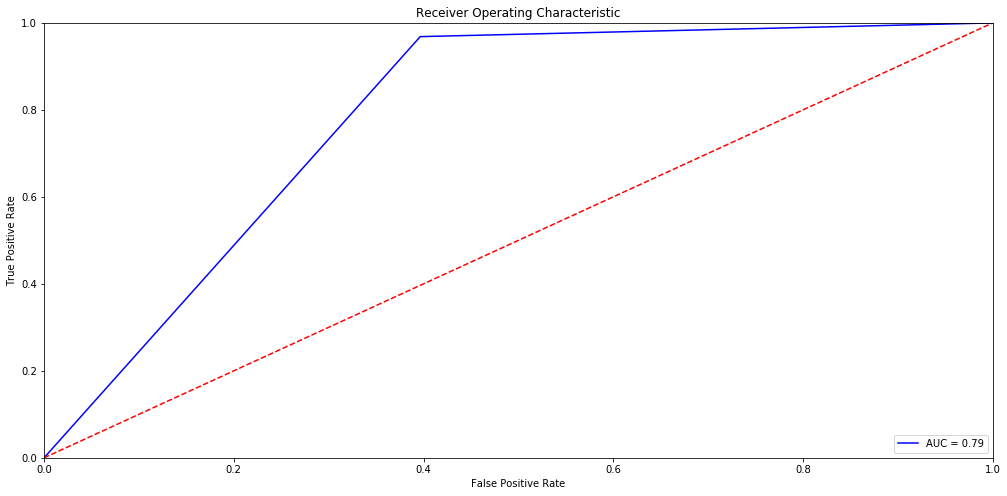

In [205]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 17,8
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### **Connect With Me in Linkedin** :- https://www.linkedin.com/in/dheerajkumar1997/